# Clustering on Vehicle Dataset using Agglomerative Hierarchical Clustering

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\cars_clus.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### Data Cleaning

In [3]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

### Features Selection

In [4]:
fdf = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
fdf.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


### Normalizing Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
X = fdf.values
X_n = MinMaxScaler().fit_transform(X)

### Agglomerative Hierarchical Clustering Algorithm Model

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
dm = distance_matrix(X_n, X_n)
ahc = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
ahc.fit(X_n)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=6,
                        pooling_func='deprecated')

### Assigning Label to Data Points

In [7]:
df['Cluster']= ahc.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


### Plotting Dendrogram

<IPython.core.display.Javascript object>


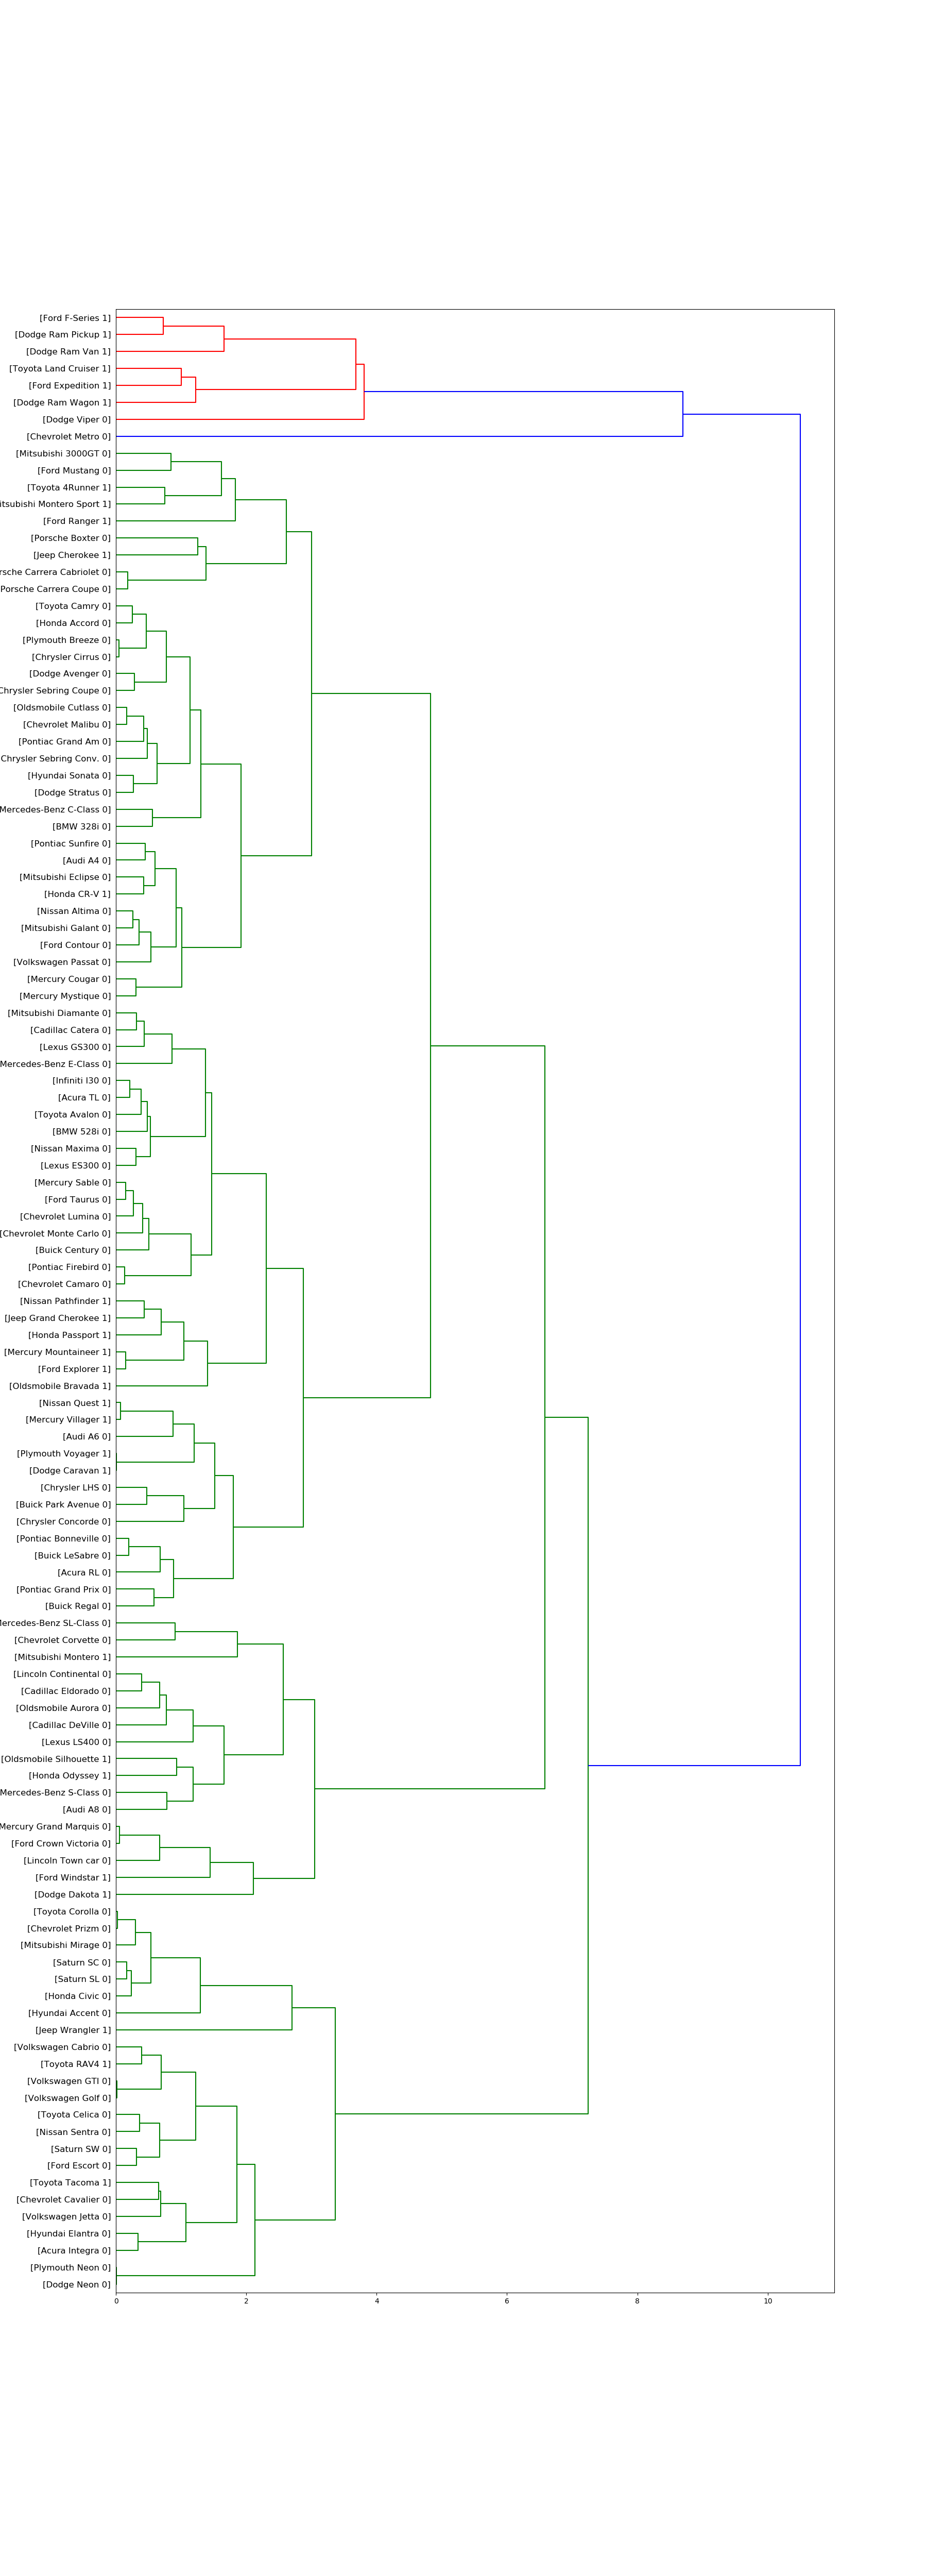

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
from scipy.cluster import hierarchy
plt.figure(figsize = (18,50))
Z = hierarchy.linkage(dm, 'complete')
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )   
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Conclusions from the Model

In [9]:
cdf = df.groupby(['Cluster', 'type'])
cdf = cdf.mean()
cdf

sales     resale      price  engine_s    horsepow  \
Cluster type                                                           
0       1.0   158.433333  19.454167  29.024667  4.483333  211.666667   
1       0.0    53.191234  15.117447  20.306128  2.246809  146.531915   
        1.0    63.701800  13.572000  17.009200  2.580000  145.000000   
2       0.0    47.725000  18.596111  27.750593  3.303704  203.111111   
        1.0    78.349273  17.056364  26.265364  3.345455  182.090909   
3       0.0    31.677000  26.922500  42.870400  4.410000  256.500000   
        1.0    90.832571  13.884286  21.527714  3.071429  160.571429   
4       0.0    21.855000   5.160000   9.235000  1.000000   55.000000   
5       0.0     7.391333  51.098333  66.010000  6.233333  365.666667   

                wheelbas      width      length  curb_wgt   fuel_cap  \
Cluster type                                                           
0       1.0   124.200000  78.516667  207.816667  4.529500  27.750000   
1       0.0   102.491489  68.857447  179.110638  2.805404  14.980851   
        1.0    99.240000  67.640000  167.920000  2.941200  16.940000   
2       0.0   108.851852  72.381481  195.651852  3.496074  17.759259   
        1.0   108.663636  70.845455  184.100000  3.821364  20.400000   
3       0.0   113.990000  75.170000  205.900000  3.956800  20.240000   
        1.0   118.814286  73.585714  201.242857  3.796429  21.857143   
4       0.0    93.100000  62.600000  149.400000  1.895000  10.300000   
5       0.0    99.900000  73.533333  177.833333  3.570000  19.733333   

                    mpg   lnsales  partition  
Cluster type                                  
0       1.0   16.166667  4.181500        0.0  
1       0.0   27.021277  3.220085        0.0  
        1.0   22.200000  4.070800        0.0  
2       0.0   24.214815  3.491852        0.0  
        1.0   20.181818  3.819364        0.0  
3       0.0   21.500000  2.877500        0.0  
        1.0   21.428571  4.143286        0.0  
4       0.0   45.000000  3.084000        0.0  
5       0.0   19.333333  1.332000        0.0